In [1]:
import sys
!{sys.executable} -m pip install -U pip
!{sys.executable} -m pip install -U scikit-learn matplotlib

In [50]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

In [51]:
pipeline = Pipeline([
    ("poly",   PolynomialFeatures(include_bias=False)),
    ("linreg", LinearRegression()),
])

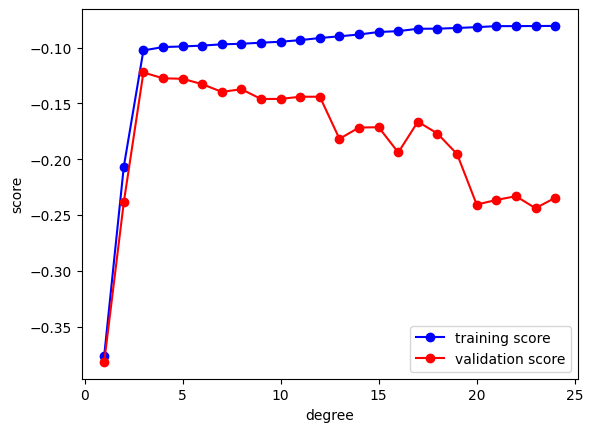

In [85]:
from sklearn.model_selection import validation_curve

np.random.seed(3)

N_samples = 50
degrees = np.arange(0,25)

X_samples = np.sort(np.random.rand(N_samples))
y_samples = true_fun(X_samples) + np.random.randn(N_samples) * 0.1

train_score, val_score = validation_curve(
    pipeline,
    X_samples[:,np.newaxis],
    y_samples,
    param_name='poly__degree',
    param_range=degrees,
    cv=10,
    scoring='neg_root_mean_squared_error'
    #scoring='explained_variance'
    #scoring='neg_mean_absolute_error'
    #scoring='r2'
)

plt.plot(degrees, np.median(train_score, 1), marker='o', color='blue', label='training score')
plt.plot(degrees, np.median(val_score, 1),   marker='o', color='red', label='validation score')
plt.legend(loc='best')
#plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');